# Computable Dart Board

### This build on the Physical Dart Board we used in the first class period!
### First we are going to form teams and elect captain for each team. 
Your team name will be sected from the combination of the text formed by <span style="color:blue">***random adjective-random noun***</span> for example it could be <span style="color:red">***lazy-ficus***

<img src="https://chandrunarayan.github.io/fcsr/geometry/pi1.png" align="left" width=400 />
Here we have a circular dart board with radius R inscribed in a square. If you threw <span style="color:red"</span>A LOT OF DARTS</span> then Area = number of darts!

$$Circle\_Area={\pi}\times{R}^2$$

$$Square\_Area=(2\times{R})^2$$

$$\frac{Square\_Area}{Circle\_Area}=\frac{4\times{R}^2}{\pi\times{R}^2}=\frac{4}{\pi}$$

$$\frac{Darts\_in\_Square}{Darts\_in\_Circle}=\frac{4}{\pi}$$
$${\pi}={4}\times(\frac{Darts\_in\_Circle}{Darts\_in\_Square})$$

<span style="color:blue">Rearrange this to find PI using your calculator and write it in your notebook!</span>  Which team came the closest to the corect value ??



## Let the computer play Darts to calculate PI throw hundreds of Darts !!
1. We will walk through each code cell below!

In [1]:
#### IMPORT LIBRARIES Code Block
import board
import neopixel
from time import sleep
from gpiozero import LED, Button
from datetime import datetime

In [2]:
totalThrows=100   # how many times we throw the dart

In [3]:
#### BUTTON SETUP Code Block

# BUTTON setup

bclicked = False;

# This is the Callback funtion when button is pressed
# Each time it is pressed this function is called by the system
def pressed(button):
    
    global bclicked
    
    current_time = datetime.now()
    print(f'button {button.pin.number} was pressed @ {current_time}')
    bclicked = not bclicked
# The Callback funtion ENDS HERE

gpio_btnpin = 4  # Connect one Button lead to GPIO4 other to GND
button = Button(gpio_btnpin) # Tell the button object that the pin is GPIO4

# 'pressed' is callback function above
# 'button.when_pressed' is the event it reacts to
button.when_pressed = pressed



In [4]:
### Pixel Board Setup Block
pixel_pin = board.D18
num_pixels = 100
ORDER = neopixel.RGB
pixels = neopixel.NeoPixel(pixel_pin, num_pixels, 
                           brightness=0.1, auto_write=False,
                           pixel_order=ORDER)

In [5]:
def reset():
    for ii in range(num_pixels):
        pixels.fill((0,0,0))
        pixels[ii]=((0,0,0))
        pixels.show()
    sleep(2)

In [6]:
def initialize():   # set leds white-off
    for ii in range(3):         # flash white 3-times
        pixels.fill((0,0,0))
        #print(pixels)
        pixels.show()
        sleep(0.1)
        pixels.fill((255,255,255))
        #print(pixels)
        pixels.show()
        sleep(0.2)
    pixels.fill((0,0,0))
    #print(pixels)
    pixels.show()    

In [7]:
# Creating pixel conversion 2-D Array 
import math
import numpy as np

P = np.array([[90,91,92,93,94,95,96,97,98,99], 
              [89,88,87,86,85,84,83,82,81,80],
              [70,71,72,73,74,75,76,77,78,79], 
              [69,68,67,66,65,64,63,62,61,60],
              [50,51,52,53,54,55,56,57,58,59], 
              [49,48,47,46,45,44,43,42,41,40],
              [30,31,32,33,34,35,36,37,38,39], 
              [29,28,27,26,25,24,23,22,21,20],
              [10,11,12,13,14,15,16,17,18,19], 
              [ 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]])  

def pix(x,y):  
    p = math.trunc(5*(x+0.99))
    q = math.trunc(5*(y-0.99))    
    r = abs(q)
    c = abs(p)
    #print(f'r = {r} c = {c}')
    return P[r][c]

In [8]:
#function to setup the plot and dartboard
import numpy as np
import matplotlib.pyplot as plt

def plot_dartboard():
    fig, axs = plt.subplots(1)
    plt.margins(0.005, tight=True)
    axs.set_aspect('equal')
    theta = np.linspace(0, 2*np.pi, num_pixels)
    radius = 1
    a = radius * np.cos(theta)
    b = radius * np.sin(theta)    
    axs.plot(a,b)

button 4 was pressed @ 2023-03-23 23:29:19.267827


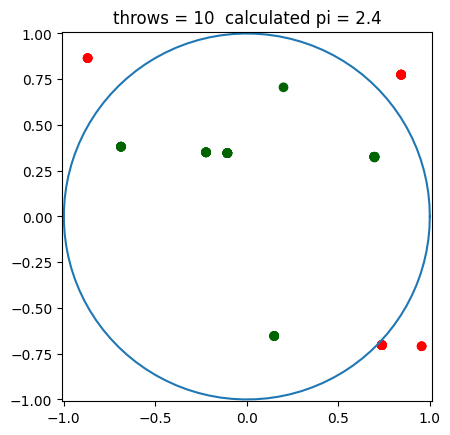

   --- threw 10 darts in 7.26 seconds ---
button 4 was pressed @ 2023-03-23 23:29:26.040378


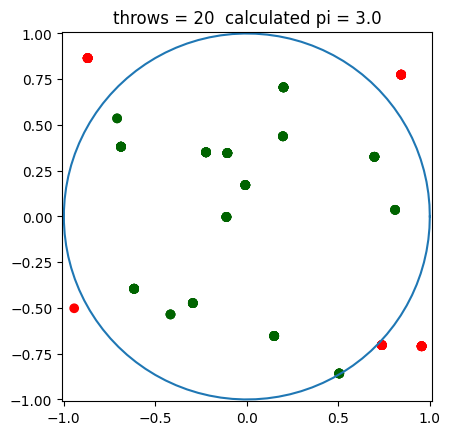

   --- threw 20 darts in 13.94 seconds ---
button 4 was pressed @ 2023-03-23 23:29:40.839832


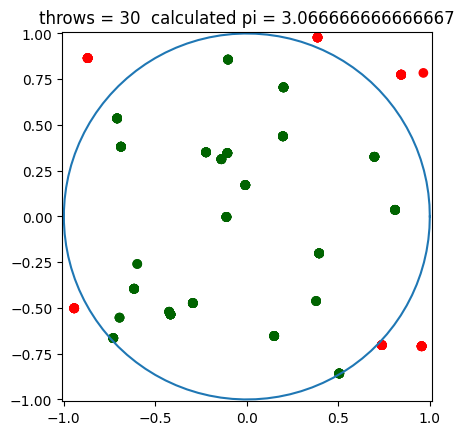

   --- threw 30 darts in 28.77 seconds ---
button 4 was pressed @ 2023-03-23 23:29:50.628792


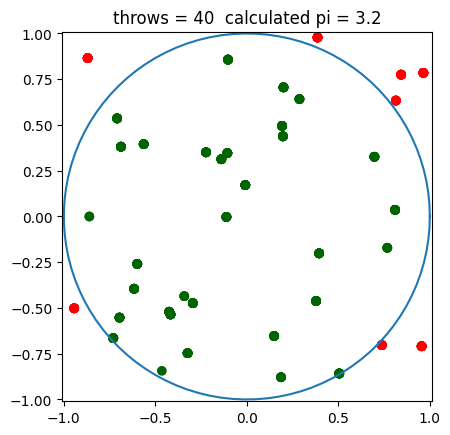

   --- threw 40 darts in 38.55 seconds ---
button 4 was pressed @ 2023-03-23 23:29:59.848838


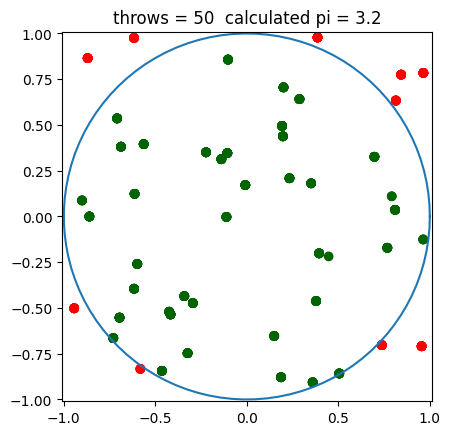

   --- threw 50 darts in 47.79 seconds ---
button 4 was pressed @ 2023-03-23 23:30:08.705734


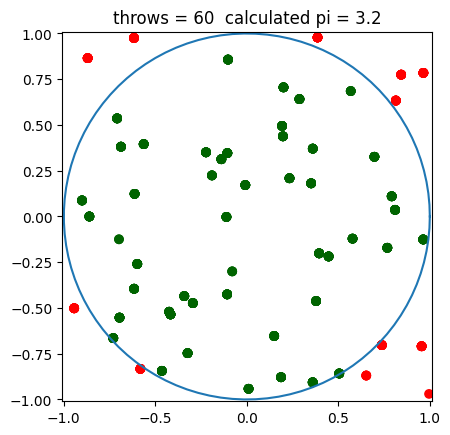

   --- threw 60 darts in 56.66 seconds ---
button 4 was pressed @ 2023-03-23 23:30:17.972921


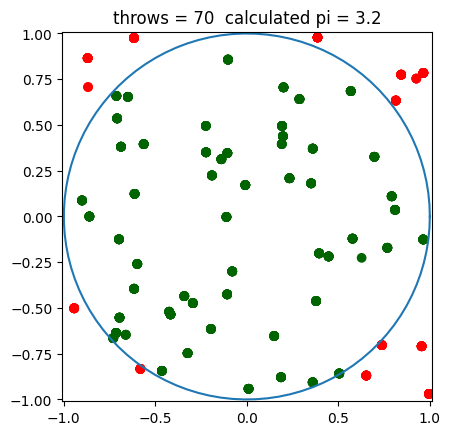

   --- threw 70 darts in 65.97 seconds ---


In [ ]:
#Derive PI from a circle inscribed in a square
import random,math,time
import matplotlib.pyplot as plt

# setup time
start_time = time.time()

# reset neopixel array
reset()
initialize()

throwsInsideCircle = 0 # starting value for a counter
throwsOutsideCircle = 0

ax = []
ay = []
cl = []

while True:
    if bclicked:
        plot_dartboard()
        for throw in range(10): # loop
          x = random.random()*2 -1 # a random x value between [-1.0000,0.99999] not including 1
          ax.append(x)
          y = random.random()*2 -1 # a random y value between [-1.0000,0.99999] not including 1
          ay.append(y)

          if(x*x + y*y <= 1.0): # if inside the circle (distance squared)
            throwsInsideCircle += 1
            cl.append('darkgreen')
            plt.scatter(ax, ay, color=cl)
            pixels[pix(x,y)]=((0,255,0))
          else:
            throwsOutsideCircle += 1
            cl.append('red')
            plt.scatter(ax, ay, color=cl)
            pixels[pix(x,y)]=((255,0,0))

          # all done, compute pi
          pi = (4.0*throwsInsideCircle)/(throwsInsideCircle + throwsOutsideCircle)
          #print(pi) 
          #print("--- %s seconds ---" % (time.time() - start_time))

          # show darts in neopixel array
          pixels.show()
          #print('throws so far = ' + str(throw+1) + '  calculated pi = ' + str(pi))
          sleep(.2)
        
        plt.title('throws = ' + str(throwsInsideCircle + throwsOutsideCircle) + '  calculated pi = ' + str(pi))    
        plt.show()
        end_time = time.time()
        elapsed_time = end_time-start_time
        print(f'   --- threw {(throwsInsideCircle + throwsOutsideCircle)} darts in {elapsed_time:.2f} seconds ---')
        bclicked = not bclicked

